In [17]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.columns.tolist()

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [19]:
print("missing values in each column",dataset.isna().sum())

missing values in each column CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [21]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
X = dataset.drop(['CustomerID'], axis=1)

In [25]:
bins=[0,40,70,100]
labels=['Low','Medium','High']
pd.crosstab(dataset['Gender'],pd.cut(dataset['Spending Score (1-100)'],bins=bins,labels=labels))

Spending Score (1-100),Low,Medium,High
Gender,,,
Female,34,46,32
Male,29,37,22


In [27]:
#optional
X['Gender']=X['Gender'].map({'Male':0,'Female':1})

corr_matrix=X.corr(numeric_only=True)
print(corr_matrix)

                          Gender       Age  Annual Income (k$)  \
Gender                  1.000000 -0.060867           -0.056410   
Age                    -0.060867  1.000000           -0.012398   
Annual Income (k$)     -0.056410 -0.012398            1.000000   
Spending Score (1-100)  0.058109 -0.327227            0.009903   

                        Spending Score (1-100)  
Gender                                0.058109  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


In [18]:
#correlation between numerical columns
num_col=X.select_dtypes(include=['number'])
corr_matrix=num_col.corr()
print(corr_matrix)

                          Gender       Age  Annual Income (k$)  \
Gender                  1.000000 -0.060867           -0.056410   
Age                    -0.060867  1.000000           -0.012398   
Annual Income (k$)     -0.056410 -0.012398            1.000000   
Spending Score (1-100)  0.058109 -0.327227            0.009903   

                        Spending Score (1-100)  
Gender                                0.058109  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


In [29]:
X.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [31]:
X = X.iloc[:, [2, 3]].values#select all the rows and columns at index 2 and 3

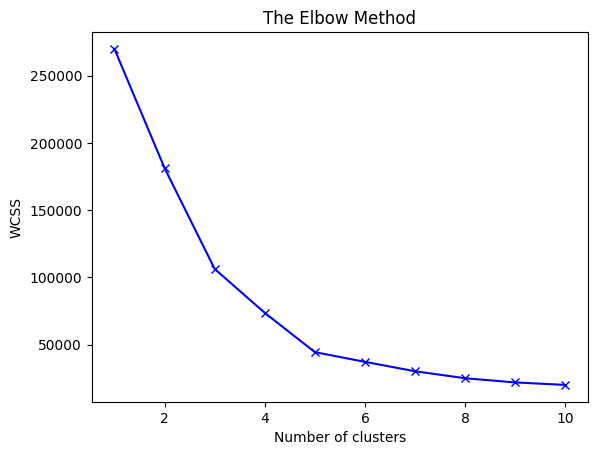

In [33]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10,random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init=10,random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [39]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [59]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, y_kmeans)
print(f'Silhouette Score for k=5: {score:.2f}')

Silhouette Score for k=5: 0.55


In [63]:
new_labels = kmeans.predict([[15,39]])
new_labels


array([4])

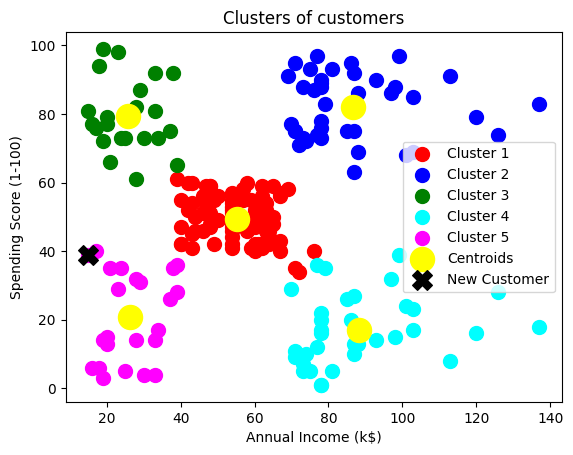

In [66]:
#check ansswer
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.scatter(15, 39, s=200, c='black', marker='X', label='New Customer')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()